# By Prisca

In [1]:
#This dataset contains information on the relationship between personal attributes 
#(age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges.
#It can be used to study how these features influence insurance costs and develop
#predictive models for estimating healthcare expenses.

In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
df.shape # dataset size

(1337, 7)

# data cleaning

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
# duplicates removed

In [8]:
dfr=df.drop_duplicates(inplace=True)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1337, 7)

In [11]:
df.groupby('sex')['smoker'].value_counts()

# we have 547 female that smoke ,115 that doesnt smoke, which means the number of female that smaoke is high
#we have 516 male that doesnt smoke  and 159 that smoke
# female some more than male

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
Name: count, dtype: int64

In [12]:
ft=df.groupby('region')['charges'].aggregate(['sum','mean'])

In [13]:
ft

,sum,mean
region,,
northeast,4.343669e+06,13406.384516
northwest,4.034072e+06,12450.840844
southeast,5.363690e+06,14735.411438
southwest,4.012755e+06,12346.937377


In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# visualization

In [16]:
import warnings
warnings . filterwarnings('ignore')

Text(0.5, 1.0, 'region vs charges')

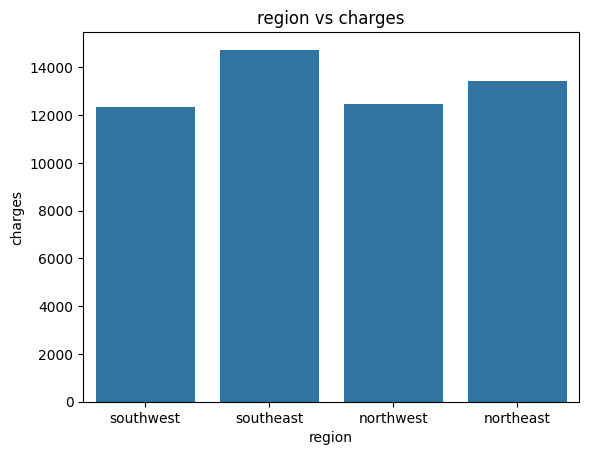

In [17]:
sns.barplot(x='region',y='charges', data=df , ci=None)
plt.title('region vs charges')

# south East seems to be the highest who engage more in insurnce, the east region at large
# the company is not getting more client from the west region


Text(0.5, 1.0, 'Smoke vs charges')

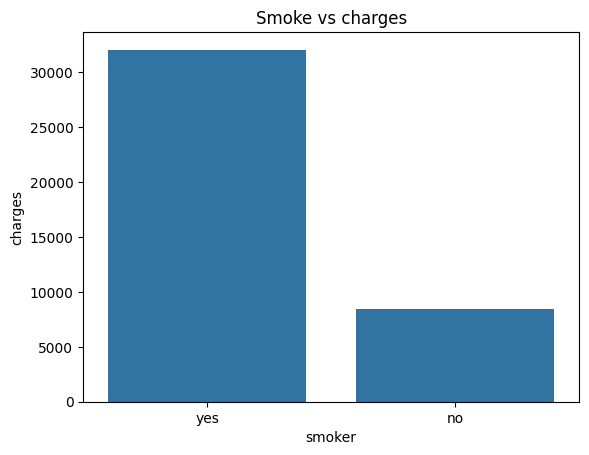

In [18]:
sns.barplot(x='smoker',y='charges', data=df , ci=None)
plt.title('Smoke vs charges')

# this chart shows that high percent of the who are insured are smokers

<Axes: ylabel='charges'>

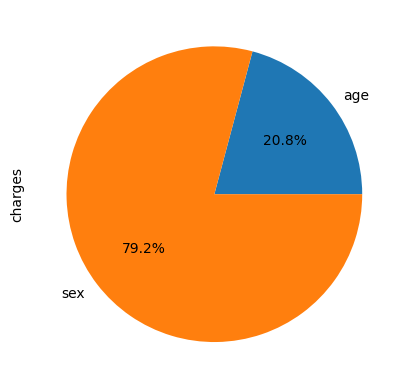

In [19]:
df.groupby('smoker')['charges'].mean().plot(kind='pie', autopct='%1.1f%%', labels=df)

# shows that 79.2% of the company customers are smokers 

<Axes: xlabel='children', ylabel='charges'>

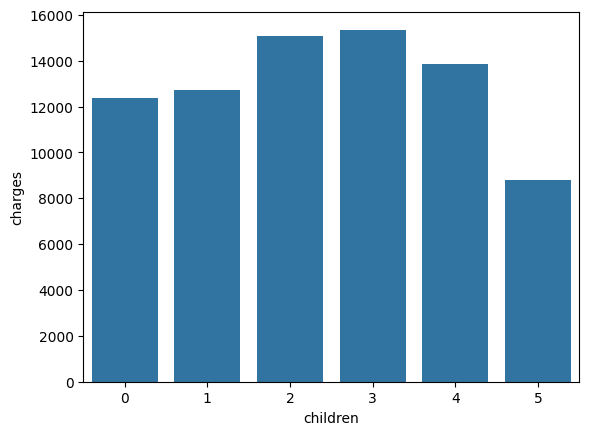

In [20]:
sns.barplot(x='children',y='charges',data=df,ci=None)
# this shows that people who have 3-4 children are more interested in insurance

<Axes: ylabel='charges'>

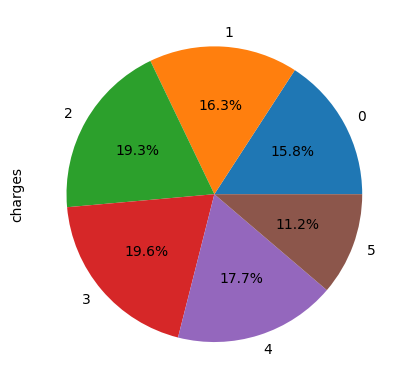

In [21]:
df.groupby('children')['charges'].mean().plot(kind='pie', autopct='%1.1f%%', )
 #only 11.2% of families with large children buys insurance

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
dfr=df.groupby(['sex','smoker'])[['age','charges']].mean()

In [28]:
dfr

age       charges
sex    smoker                         
female no      39.691042   8762.297300
       yes     38.608696  30678.996276
male   no      39.100775   8099.700161
       yes     38.446541  33042.005975

<Axes: xlabel='age', ylabel='charges'>

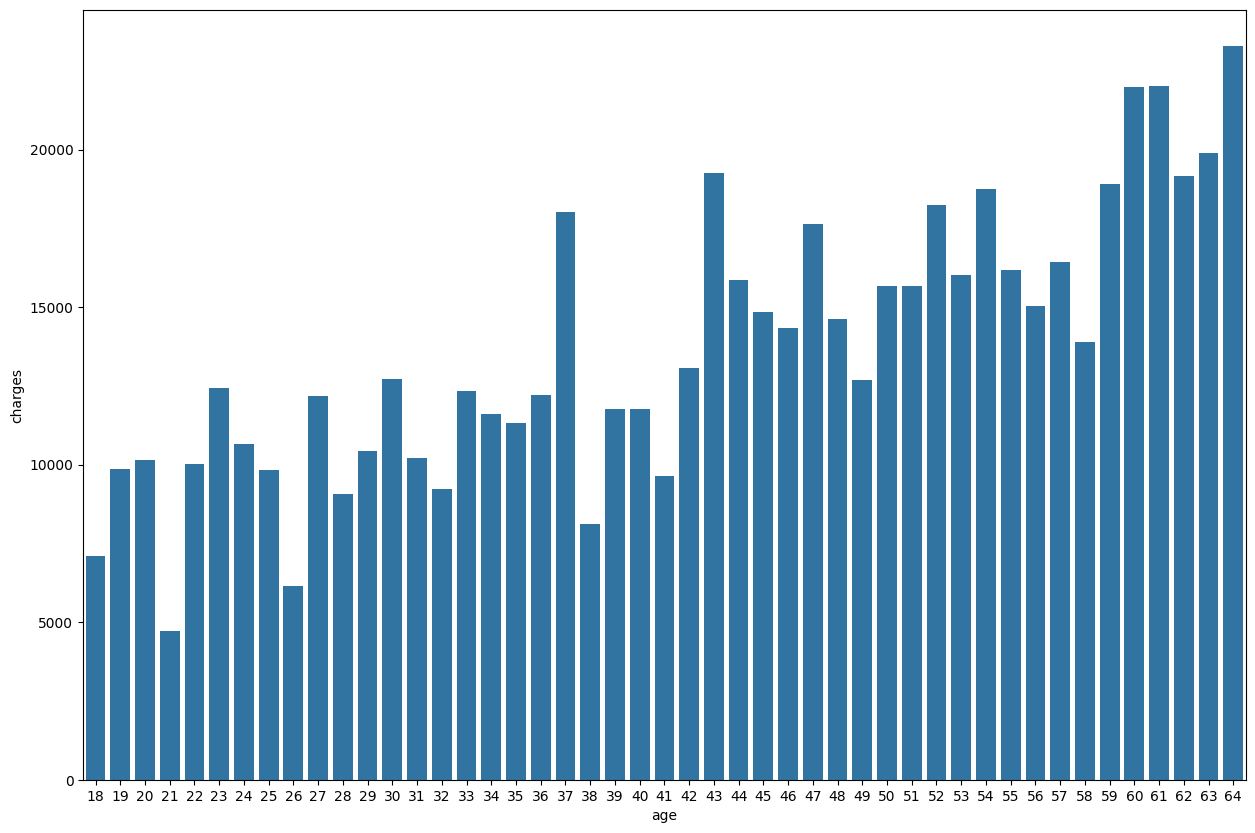

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='charges', data=df,ci=None)

# from this chart, you can see that the age of 37 and above purchase high premium plans

Text(0.5, 1.0, 'Age')

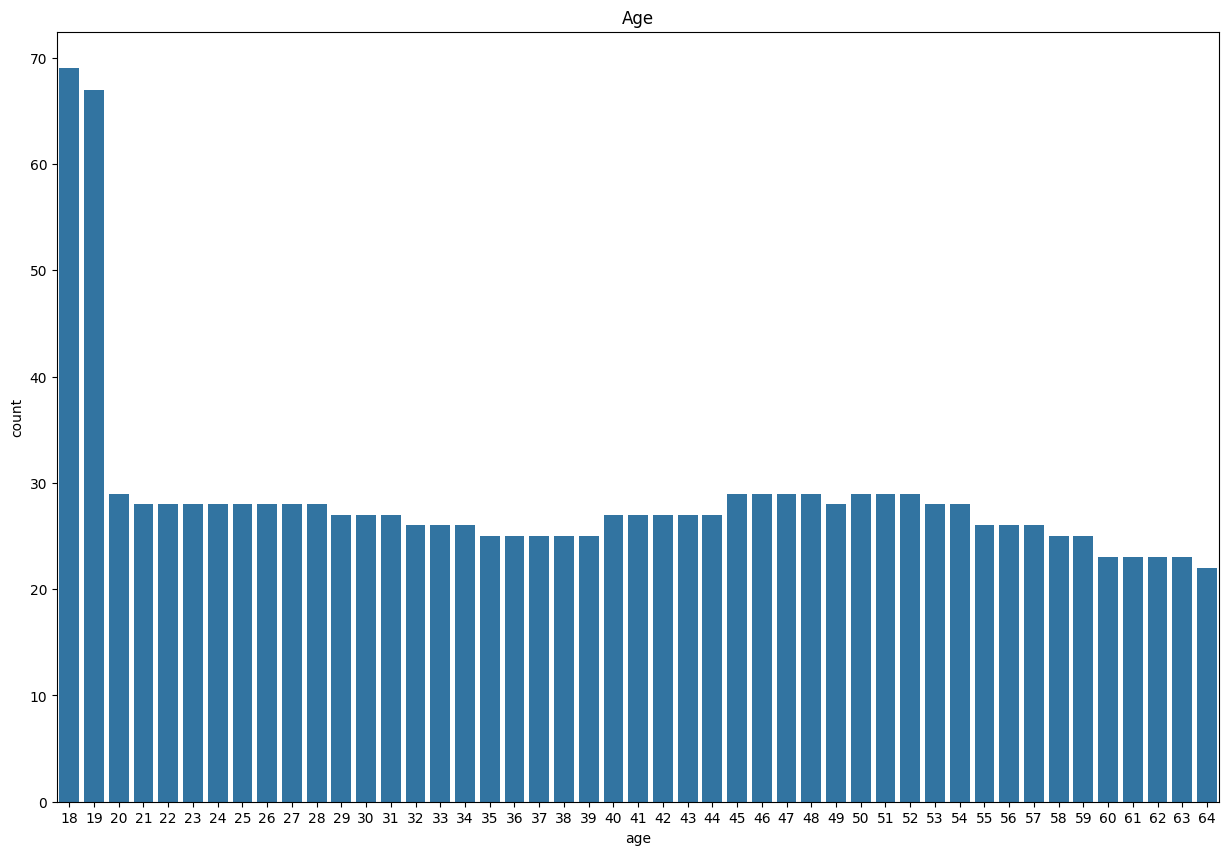

In [84]:
plt.figure(figsize=(15,10))
sns.countplot(x='age',data=df)
plt.title('Age')

In [40]:
df['age'].aggregate(['max','min'])  
# the older client in the company is 64
# the least is 18 years
# if age 18 and 19 is this high in the insurance company, the premium plan the will purchase will be the least
# it best the company diversfy into getting older people more because they have the funds and will purchase high premium package

max    64
min    18
Name: age, dtype: int64

Text(0.5, 1.0, 'charges')

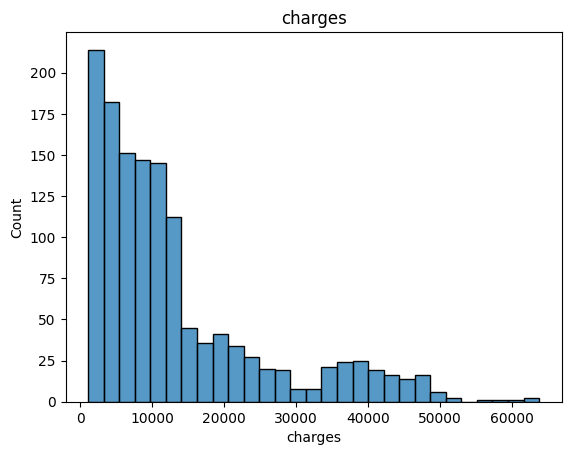

In [82]:
sns.histplot(x='charges',data=df)
plt.title('charges')
# the clients who purchase 60,000 premium plan is very very low, while client who purchase below 10,000 is extremely high
#this is why the revenue isnt growing

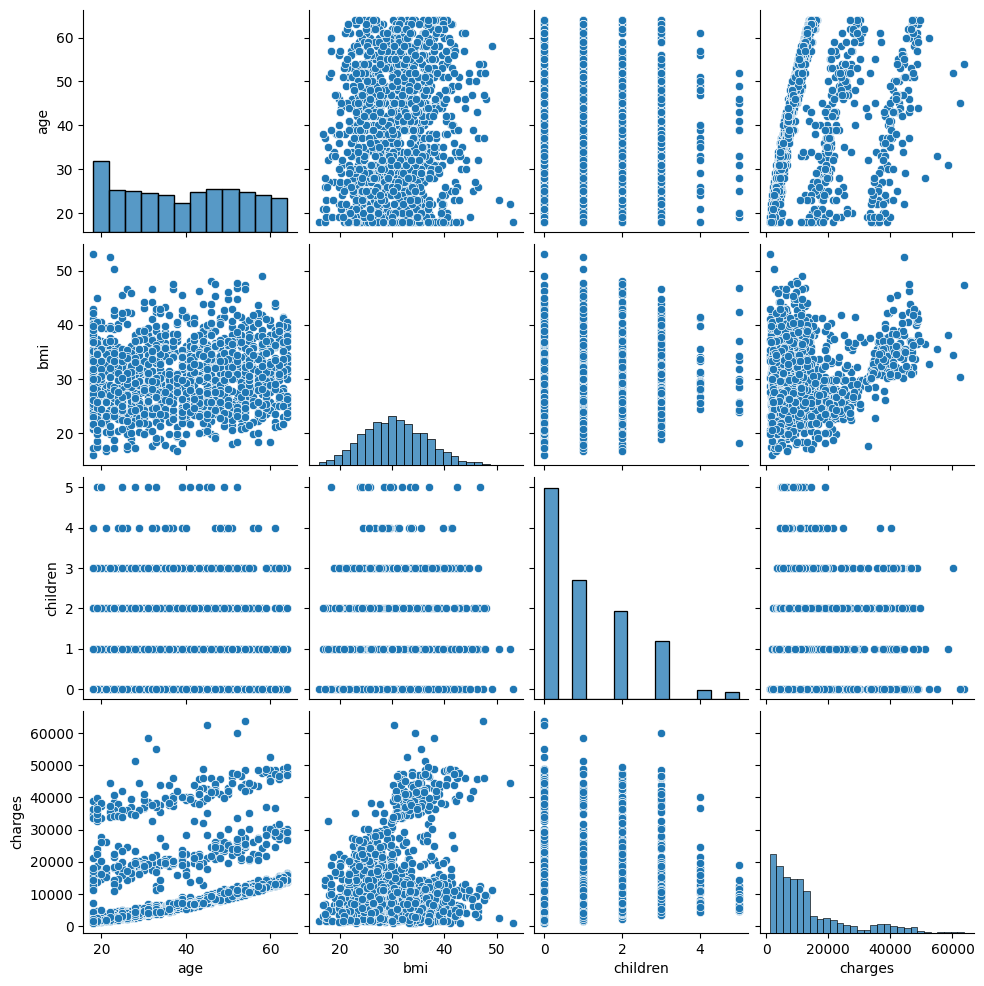

In [79]:
sns.pairplot(df)
# plotting all variable

In [44]:
# convert categorical data to numerical

In [45]:
from  sklearn .preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df_in=df.copy() # copied the df beacuse i dont want the main df altered


In [50]:
df_in['sex']=le.fit_transform(df_in['sex'])

In [53]:
df_in['region']=le. fit_transform(df_in['region'])

In [55]:
df_in['smoker']=le.fit_transform(df_in['smoker'])

In [61]:
df_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
# correlation

In [73]:
df_corr=df_in.corr()

In [74]:
df_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

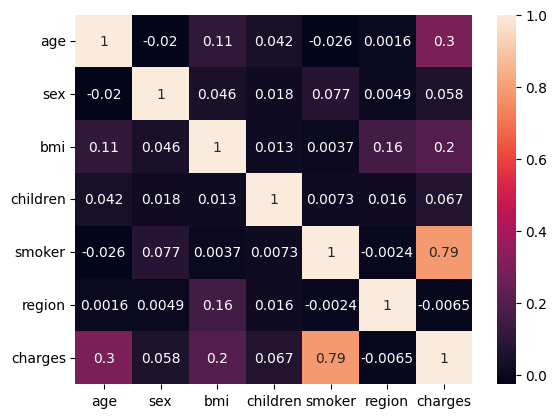

In [76]:
sns.heatmap(df_corr,annot=True)  # no high correlation detected to affect the analysis

In [63]:
x=df_in[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df_in['charges']

In [64]:
from sklearn .model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Normalization

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler=MinMaxScaler()

In [68]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [69]:
x_train.shape,x_test.shape

((1069, 6), (268, 6))

In [90]:
# build the model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model=LinearRegression()

In [94]:
model.fit(x_train,y_train)

LinearRegression()

In [95]:
model.score(x_train,y_train)

0.7487799749798774

# predictions

In [96]:
ypred=model.predict(x_test)

In [97]:
pd.DataFrame({'actual':y_test,
              'predicted':ypred})

,actual,predicted
1248,1633.96180,5249.621104
610,8547.69130,9614.071648
393,9290.13950,11264.864969
503,32548.34050,26114.255762
198,9644.25250,6987.316658
...,...,...
809,3309.79260,3702.024500
726,6664.68595,8024.566821
938,2304.00220,1835.569009
474,25382.29700,34190.783511


# model Evaluation

In [99]:
from sklearn .metrics import r2_score

In [108]:
r2_score(y_test,ypred) # accuracy score

0.7526726290709554

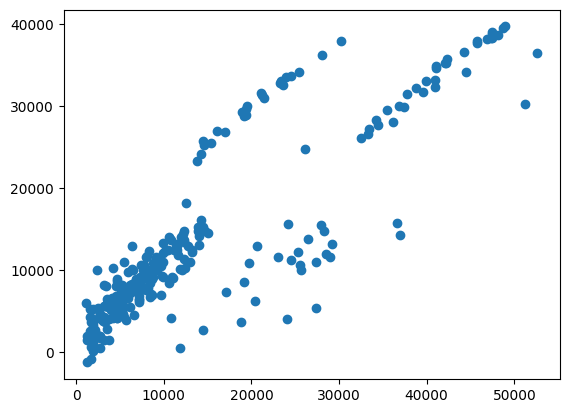

In [105]:
plt.scatter(y_test,ypred)

<Axes: xlabel='charges'>

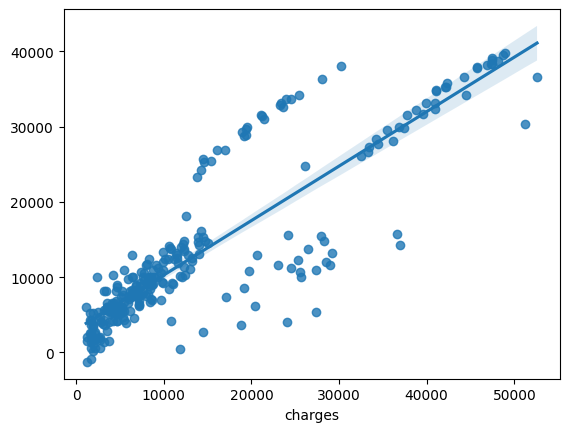

In [107]:
sns.regplot(x=y_test,y=ypred)

# validation

In [110]:
from  sklearn.model_selection import KFold,cross_val_score

In [111]:
kf=KFold(n_splits=5)
score=cross_val_score(model,x_train,y_train,cv=kf)

In [113]:
score # no overfitting

array([0.79074606, 0.63446072, 0.77162343, 0.74968057, 0.75313448])

In [115]:
df_in.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# model testing

In [116]:
model.predict(scaler.transform([[18	,1,	33.770,	1	,0,	2]]))

array([3677.86055258])

In [118]:
model.predict(scaler.transform([[32,	1,	28.880,	0,	0	,1	]])) # model can still be modified

array([5475.68705239])

# conclusion

In [ ]:
# Age ,bmi,and smoker are the features that impact highly on insurance charges

# findings

In [121]:
# the highest age of the client companies is 64 and lowest 18.
# this data shows that below 10000 premium charge are highly purchased than that of 60000.
# the family size that purchase insurance in this company ranges from 3 and 4 sizes.
# the region that purchase more insurance are east region
# because the company has high teanagers who cant afford high insurance charge, the company sales will be low

# recommendation

In [123]:
# To increase the sales and growth, they should implement the following:
# 1,Put effort into advertising their product to older people( 37yrs and above) because the have the resource and
# high chances to buying high premium plan.
# 2,put bill boards or send their marketers to the west regions to escout more client
# 3 they should educated and convince large families into buying insurance